# Realize HW03 question 2-2 with no Pytorch (nn2)

## import package

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

## define parameter

In [77]:
# inputs
x = np.array([[-1., -1.],
              [-1.,  1.],
              [ 1., -1.],
              [ 1.,  1.]])
# desire output
Yd = np.array([[0.],
               [1.],
               [1.],
               [0.]])

# nn model 1
## hidden layer weight(1, 2)
wh = np.array([[0.2, -0.4]])
## hidden layer bias
bh = -0.8
## output layer weight wy
wy = np.array([[0.2, -0.2, -0.4]])
## output layer bias by
by = -0.3

# learning rate
lr = 0.1


# epochs
epochs = 40000


## define active function

In [78]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


## gradient of active function
#### ref: https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e

In [79]:
def sigmoid_der(x): 
    return x * (1 - x)


In [80]:
log = []
for i in tqdm(range(epochs)):
    # forward pass
    zh = np.dot(x, wh.T) + bh
    ah = sigmoid(zh)
    zo = np.dot(np.hstack((x, ah)), wy.T) + by
    y_pred = sigmoid(zo)

    # error calculate
    error = Yd - y_pred
    ## MSE
    loss = np.mean(error**2) 
    log.append(loss.tolist())

    # backward pass
    delta = error * sigmoid_der(y_pred)
    delta_h = np.dot(delta, wy[:,-1].reshape(1, 1)) * sigmoid_der(ah)

    # update weights and biases
    wy += lr * np.dot(np.hstack((x, ah)).T, delta).reshape(wy.shape)
    wh += lr * np.dot(x.T, delta_h).reshape(wh.shape)
    by += lr * np.sum(delta, axis=0)
    bh += lr * np.sum(delta_h, axis=0)


100%|██████████| 40000/40000 [00:01<00:00, 21586.40it/s]


In [81]:
print(y_pred)

[[0.0243551 ]
 [0.97279503]
 [0.97279503]
 [0.02722222]]


## Plot the loss curve

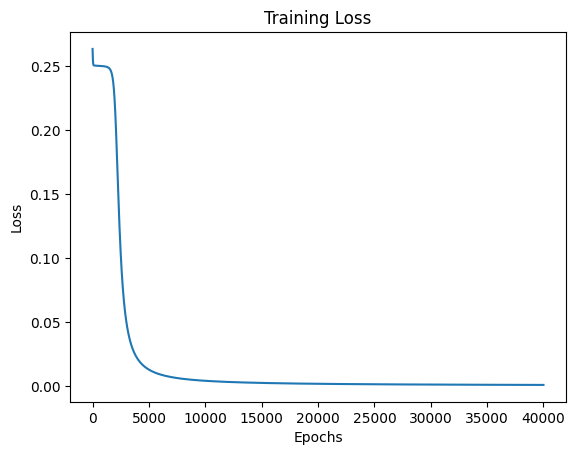

In [82]:
# plot loss curve with stride
plt.plot(np.array(log).flatten())
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()